## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:


def build_mlp(input_shape, output_units = 10, num_units = [512, 256, 128], drop_ratio = 0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_units):
        if i == 0:
            x = keras.layers.Dense(units = n_units, activation = "relu", name = f"hidden_layer{i+1}")(input_layer)
            x = keras.layers.Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units = n_units, activation = "relu", name = f"hidden_layer{i+1}")(x)
            x = keras.layers.Dropout(drop_ratio)(x)
            
    out = keras.layers.Dense(units = output_units, activation = "softmax", name = "output")(x)
    
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    """Code Here
    建立你的神經網路
    """
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.3, 0.2, 0.1]


In [13]:
results = {}

for drop_ration in Dropout_EXP:
    keras.backend.clear_session()
    
    model = build_mlp(input_shape=x_train.shape[1:], drop_ratio=drop_ration)
    model.summary()

    optimizer = keras.optimizers.Adam(lr = LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    tag = f"drop_ration={drop_ration}"
    results[tag] = {"train_loss":train_loss, 
                    "valid_loss":valid_loss,
                    "train_acc":train_acc,
                    "valid_acc":valid_acc}
                   
    """Code Here
    撰寫你的訓練流程並將結果用 dictionary 紀錄
    """

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0     

196/196 [==============================] - 3s 16ms/step - loss: 1.5578 - accuracy: 0.4375 - val_loss: 1.5088 - val_accuracy: 0.4605
Epoch 49/50
196/196 [==============================] - 3s 15ms/step - loss: 1.5628 - accuracy: 0.4366 - val_loss: 1.5167 - val_accuracy: 0.4649
Epoch 50/50
196/196 [==============================] - 3s 14ms/step - loss: 1.5611 - accuracy: 0.4372 - val_loss: 1.5530 - val_accuracy: 0.4537
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 2

196/196 [==============================] - 3s 15ms/step - loss: 1.4091 - accuracy: 0.4922 - val_loss: 1.3967 - val_accuracy: 0.5028
Epoch 46/50
196/196 [==============================] - 3s 17ms/step - loss: 1.3914 - accuracy: 0.4999 - val_loss: 1.3970 - val_accuracy: 0.5033
Epoch 47/50
196/196 [==============================] - 3s 15ms/step - loss: 1.3962 - accuracy: 0.5000 - val_loss: 1.4084 - val_accuracy: 0.4973
Epoch 48/50
196/196 [==============================] - 3s 16ms/step - loss: 1.3957 - accuracy: 0.5007 - val_loss: 1.3788 - val_accuracy: 0.5103
Epoch 49/50
196/196 [==============================] - 3s 16ms/step - loss: 1.4018 - accuracy: 0.4930 - val_loss: 1.4121 - val_accuracy: 0.4964
Epoch 50/50
196/196 [==============================] - 3s 17ms/step - loss: 1.3922 - accuracy: 0.4975 - val_loss: 1.3905 - val_accuracy: 0.5021
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
i

196/196 [==============================] - 3s 15ms/step - loss: 1.1901 - accuracy: 0.5714 - val_loss: 1.3520 - val_accuracy: 0.5226
Epoch 43/50
196/196 [==============================] - 3s 15ms/step - loss: 1.1791 - accuracy: 0.5732 - val_loss: 1.3452 - val_accuracy: 0.5234
Epoch 44/50
196/196 [==============================] - 3s 16ms/step - loss: 1.1524 - accuracy: 0.5820 - val_loss: 1.3477 - val_accuracy: 0.5248
Epoch 45/50
196/196 [==============================] - 3s 15ms/step - loss: 1.1681 - accuracy: 0.5787 - val_loss: 1.3317 - val_accuracy: 0.5301
Epoch 46/50
196/196 [==============================] - 3s 15ms/step - loss: 1.1403 - accuracy: 0.5885 - val_loss: 1.3386 - val_accuracy: 0.5325
Epoch 47/50
196/196 [==============================] - 3s 16ms/step - loss: 1.1474 - accuracy: 0.5857 - val_loss: 1.3611 - val_accuracy: 0.5200
Epoch 48/50
196/196 [==============================] - 3s 17ms/step - loss: 1.1498 - accuracy: 0.5854 - val_loss: 1.3260 - val_accuracy: 0.5314
Epoc

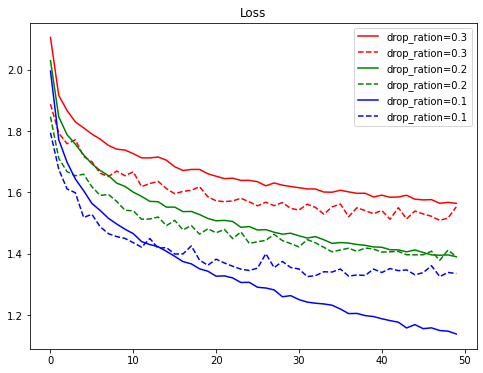

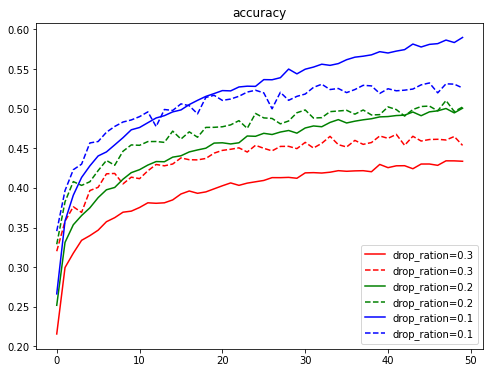

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])), results[cond]['train_loss'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'], '--', label = cond, color = color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])), results[cond]['train_acc'], '-', label = cond, color = color_bar[i])
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'], '--', label = cond, color = color_bar[i])
plt.title("accuracy")
plt.legend()
plt.show()